In [1]:
# importing the modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR


In [2]:
# Reading the dataset
df = pd.read_csv('Reddit.csv')
print(df)

             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October is Domestic Violence Awareness M

In [3]:
# Perform label encoding for the categorical variable
label_encoder = LabelEncoder()
df['subreddit'] = label_encoder.fit_transform(df['subreddit'])

In [4]:
X = df[['subreddit','syntax_ari','confidence', 'syntax_fk_grade', 'sentiment', 'lex_dal_avg','social_upvote','lex_dal_min','lex_dal_max','lex_liwc']]
y = df['social_karma']

In [5]:
# As we have our varaibles categorised now we shall create the test and train dataset with the ratio being 80:20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression


In [6]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

0.5942238692128492


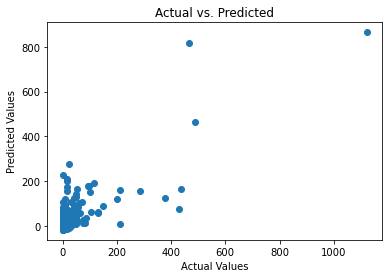

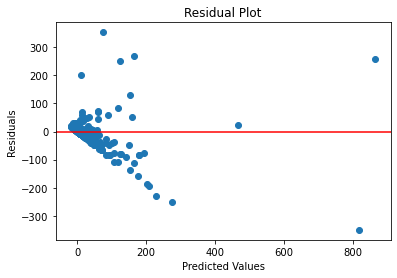

In [7]:
# Model coefficients
lr_coefficients = lr_model.coef_  # For multiple linear regression
lr_intercept = lr_model.intercept_

# Evaluation metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
r2_linear = r2_score(y_test, lr_pred)

print(r2_linear)
# Residuals analysis
residuals = y_test - lr_pred

# Plotting
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

plt.scatter(lr_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Decision tree regression

In [8]:

# Create a decision tree regressor
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)


0.4304299699172376


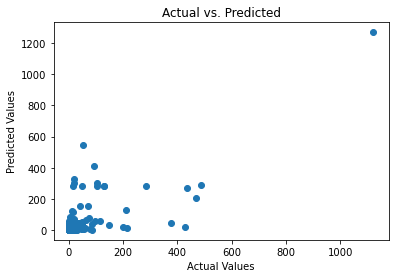

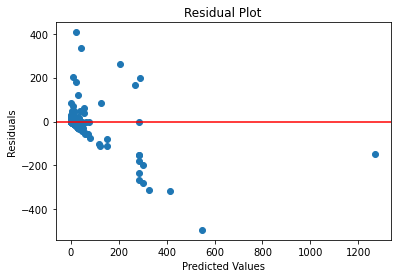

In [9]:
# Evaluation metrics
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
r2_dec = r2_score(y_test, dt_pred)
print(r2_dec)
# Residuals analysis
residuals = y_test - dt_pred

# Plotting
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

plt.scatter(dt_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Random Forest Regression

In [10]:

# Create a random forest regressor
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)


0.6309681696021444


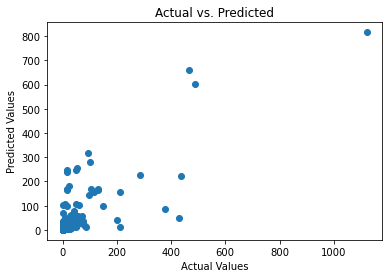

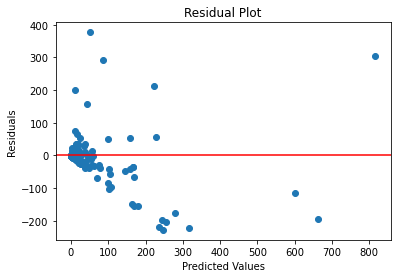

In [11]:
# Evaluation metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
r2_ran = r2_score(y_test, rf_pred)
print(r2_ran)
# Residuals analysis
residuals = y_test - rf_pred

# Plotting
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

plt.scatter(rf_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Gradient Boosting

In [12]:
# Create a gradient boosting regressor
gb_model = xgb.XGBRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)


0.5840376208815271


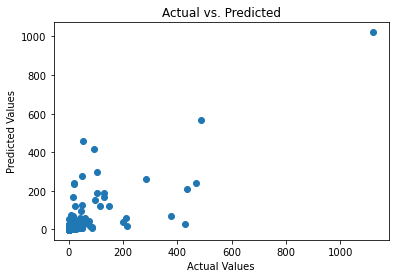

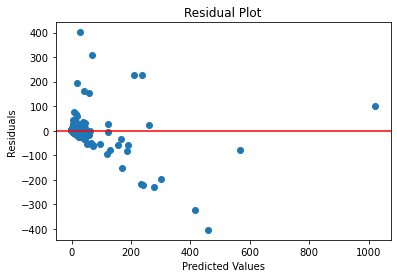

In [13]:
# Evaluation metrics
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
r2_grad = r2_score(y_test, gb_pred)
print(r2_grad)
# Residuals analysis
residuals = y_test - gb_pred

# Plotting
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

plt.scatter(gb_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Support Vector Regression

In [14]:
# Create an SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
svr_pred = svr_model.predict(X_test)


-0.01171488227716111


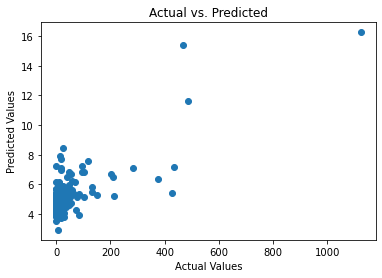

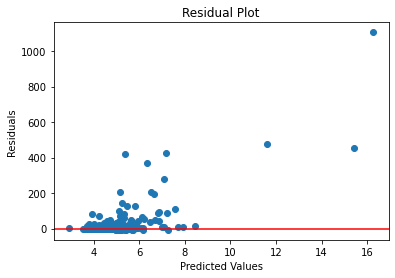

In [15]:
# Evaluation metrics
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
r2_svr = r2_score(y_test, svr_pred)
print(r2_svr)
# Residuals analysis
residuals = y_test - svr_pred

# Plotting
plt.scatter(y_test, svr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

plt.scatter(svr_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

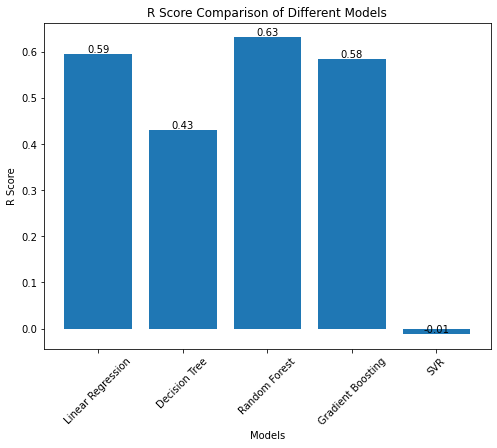

In [16]:
# Graph to check the all the models R score together
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest','Gradient Boosting','SVR']
accuracy_scores = [r2_linear,r2_dec,r2_ran,r2_grad,r2_svr]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('R Score')
plt.title('R Score Comparison of Different Models')

# Add the values on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

# Code to check which variables have positive and negative impact on the dataset.

In [17]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_

# Associate the coefficients with the input variables
variable_impact = dict(zip(X.columns, coefficients))

# Print the variable impact
for variable, impact in variable_impact.items():
    print(f"{variable}: {impact}")


subreddit: -0.40557965932146584
syntax_ari: 2.145922468984518
confidence: 5.546395217251369
syntax_fk_grade: -1.7410083335440287
sentiment: 2.6397709249778814
lex_dal_avg: 4.3141009757371025
social_upvote: 3.01246232416323
lex_dal_min: -0.6700761296705174
lex_dal_max: 2.021167339233587
lex_liwc: -0.022059173142142008


# Model 1 Using Linear Regression

In [18]:
X1 = df[['syntax_ari', 'confidence', 'sentiment', 'lex_dal_avg','social_upvote']]
y1 = df['social_karma']

In [19]:
# As we have our varaibles categorised now we shall create the test and train dataset with the ratio being 80:20.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [20]:
# Create a linear regression model
model1 = LinearRegression()

# Train the model
model1.fit(X1_train, y1_train)

# Make predictions
y_pred_1 = model1.predict(X1_test)

In [21]:
# Model coefficients
coefficients = model1.coef_  # For multiple linear regression
intercept = model1.intercept_

# Evaluation metrics
mse1 = mean_squared_error(y1_test, y_pred_1)
rmse1 = np.sqrt(mse1)
r2_linear1 = r2_score(y1_test, y_pred_1)

print(r2_linear1)

0.5934112059072097


# Model 2 Using Linear Regression

In [22]:
X2 = df[['lex_dal_min', 'confidence', 'sentiment', 'lex_dal_avg','lex_dal_max']]
y2 = df['social_karma']

In [23]:
# As we have our varaibles categorised now we shall create the test and train dataset with the ratio being 80:20.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [24]:
# Create a linear regression model
model2 = LinearRegression()

# Train the model
model2.fit(X2_train, y2_train)

# Make predictions
y_pred_2 = model2.predict(X2_test)

In [25]:
# Model coefficients
coefficients = model2.coef_  # For multiple linear regression
intercept = model2.intercept_

# Evaluation metrics
mse2 = mean_squared_error(y2_test, y_pred_2)
rmse2 = np.sqrt(mse2)
r2_linear2 = r2_score(y2_test, y_pred_2)

print(r2_linear2)

-0.0091982145749947


# Model 3 Using Linear Regression

In [26]:
X3 = df[['lex_dal_max', 'lex_dal_min', 'social_upvote', 'sentiment','confidence']]
y3 = df['social_karma']

In [27]:
# As we have our varaibles categorised now we shall create the test and train dataset with the ratio being 80:20.
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [28]:
# Create a linear regression model
model3 = LinearRegression()

# Train the model
model3.fit(X3_train, y3_train)

# Make predictions
y_pred_3 = model3.predict(X3_test)

In [29]:
# Model coefficients
coefficients = model3.coef_  # For multiple linear regression
intercept = model3.intercept_

# Evaluation metrics
mse3 = mean_squared_error(y3_test, y_pred_3)
rmse3 = np.sqrt(mse3)
r2_linear3 = r2_score(y3_test, y_pred_3)

print(r2_linear3)

0.5979872853851567


# Model 4 Using Linear Regression

In [30]:
X4 = df[['subreddit', 'syntax_fk_grade', 'lex_liwc', 'confidence','sentiment']]
y4 = df['social_karma']

In [31]:
# As we have our varaibles categorised now we shall create the test and train dataset with the ratio being 80:20.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

In [32]:
# Create a linear regression model
model4 = LinearRegression()

# Train the model
model4.fit(X4_train, y4_train)

# Make predictions
y_pred_4 = model4.predict(X4_test)

In [33]:
# Model coefficients
coefficients = model4.coef_  # For multiple linear regression
intercept = model4.intercept_

# Evaluation metrics
mse4 = mean_squared_error(y4_test, y_pred_4)
rmse4 = np.sqrt(mse4)
r2_linear4 = r2_score(y4_test, y_pred_4)

print(r2_linear4)

0.006906048880807258


# Below are the 4 models which are being used with Random Forest

In [34]:
# Model 1 Using Random Forest

X1_gb = df[['syntax_ari', 'confidence', 'sentiment', 'lex_dal_avg','social_upvote']]
y1_gb = df['social_karma']

# As we have our varaibles categorised now we shall create the test and train dataset with the ratio being 80:20.
X1_gb_train, X1_gb_test, y1_gb_train, y1_gb_test = train_test_split(X1_gb, y1_gb, test_size=0.2, random_state=0)

# Create a linear regression model
model1_gb = RandomForestRegressor()

# Train the model
model1_gb.fit(X1_gb_train, y1_gb_train)

# Make predictions
y_pred_1_gb = model1_gb.predict(X1_gb_test)

# Evaluation metrics
mse1_gb = mean_squared_error(y1_gb_test, y_pred_1_gb)
rmse1_gb = np.sqrt(mse1_gb)
r2_grad1_gb = r2_score(y1_gb_test, y_pred_1_gb)

print(r2_grad1_gb)

0.6544474866112547


In [35]:
# Model 2 Using Random Forest
X2_gb = df[['lex_dal_min', 'confidence', 'sentiment', 'lex_dal_avg','lex_dal_max']]
y2_gb = df['social_karma']

# As we have our variables categorized now we shall create the test and train dataset with the ratio being 80:20.
X2_gb_train, X2_gb_test, y2_gb_train, y2_gb_test = train_test_split(X2_gb, y2_gb, test_size=0.2, random_state=0)

# Create a linear regression model
model2_gb = RandomForestRegressor()

# Train the model
model2_gb.fit(X2_gb_train, y2_gb_train)

# Make predictions
y_pred_2_gb = model2_gb.predict(X2_gb_test)

# Evaluation metrics
mse2_gb = mean_squared_error(y2_gb_test, y_pred_2_gb)
rmse2_gb = np.sqrt(mse2_gb)
r2_grad2_gb = r2_score(y2_gb_test, y_pred_2_gb)

print(r2_grad2_gb)

-0.19008769162527872


In [36]:
# Model 3 Using Random Forest

X3_gb = df[['lex_dal_max', 'lex_dal_min', 'social_upvote', 'sentiment','confidence']]
y3_gb = df['social_karma']

# As we have our variables categorized now we shall create the test and train dataset with the ratio being 80:20.
X3_gb_train, X3_gb_test, y3_gb_train, y3_gb_test = train_test_split(X3_gb, y3_gb, test_size=0.2, random_state=0)

# Create a linear regression model
model3_gb = RandomForestRegressor()

# Train the model
model3_gb.fit(X3_gb_train, y3_gb_train)

# Make predictions
y_pred_3_gb = model3_gb.predict(X3_gb_test)


# Evaluation metrics
mse3_gb = mean_squared_error(y3_gb_test, y_pred_3_gb)
rmse3_gb = np.sqrt(mse3_gb)
r2_grad3_gb = r2_score(y3_gb_test, y_pred_3_gb)

print(r2_grad3_gb)


0.6530065560813918


In [37]:
# Model 4 Using Random Forest

X4_gb = df[['subreddit', 'syntax_fk_grade', 'lex_liwc', 'confidence','sentiment']]
y4_gb = df['social_karma']

# As we have our variables categorized now we shall create the test and train dataset with the ratio being 80:20.
X4_gb_train, X4_gb_test, y4_gb_train, y4_gb_test = train_test_split(X4_gb, y4_gb, test_size=0.2, random_state=0)

# Create a linear regression model
model4_gb = RandomForestRegressor()

# Train the model
model4_gb.fit(X4_gb_train, y4_gb_train)

# Make predictions
y_pred_4_gb = model4_gb.predict(X4_gb_test)

# Evaluation metrics
mse4_gb = mean_squared_error(y4_gb_test, y_pred_4_gb)
rmse4_gb = np.sqrt(mse4_gb)
r2_grad4_gb = r2_score(y4_gb_test, y_pred_4_gb)

print(r2_grad4_gb)


-0.36225454801444923


# The below two graphs shows the 5 models with one being linear and random forest

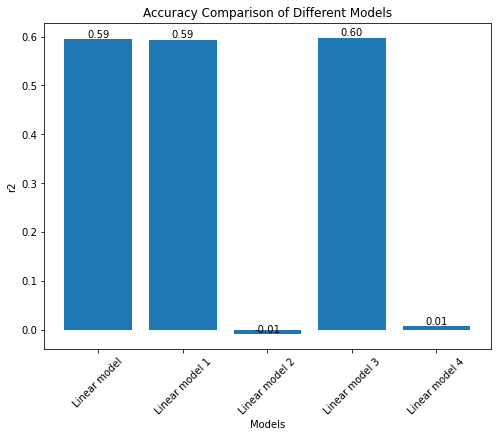

In [38]:
import matplotlib.pyplot as plt

models = ['Linear model','Linear model 1', 'Linear model 2', 'Linear model 3','Linear model 4']
accuracy_scores = [r2_linear,r2_linear1,r2_linear2,r2_linear3,r2_linear4]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('r2')
plt.title('Accuracy Comparison of Different Models')

# Add the values on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

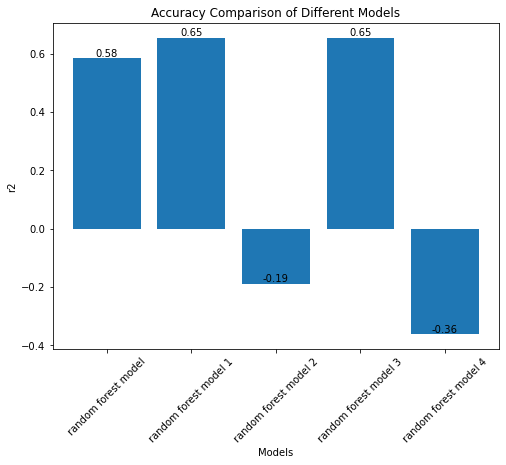

In [39]:
import matplotlib.pyplot as plt

models = ['random forest model','random forest model 1', 'random forest model 2', 'random forest model 3','random forest model 4']
accuracy_scores = [r2_grad,r2_grad1_gb,r2_grad2_gb,r2_grad3_gb,r2_grad4_gb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('r2')
plt.title('Accuracy Comparison of Different Models')

# Add the values on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a CSV file
data = df

# Select the independent variables and dependent variable
X = data[['lex_dal_max', 'lex_dal_min', 'social_upvote', 'sentiment','confidence']]
y = data['social_karma']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Model coefficients
coefficients = model.coef_  # Coefficients for each independent variable
intercept = model.intercept_  # Intercept term

# Evaluation metrics
mse = mean_squared_error(y, y_pred)  # Mean squared error
rmse = np.sqrt(mse)  # Root mean squared error
r2 = r2_score(y, y_pred)  # R-squared value

# Print the coefficients, intercept, and evaluation metrics
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Coefficients: [ 2.58198049 -3.26503901  2.89832332  1.6966921   4.27907644]
Intercept: -27.890830356929378
Mean Squared Error: 2316.3181775782123
Root Mean Squared Error: 48.12814330075712
R-squared: 0.6326325902146464
